In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 625.1/625.1 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.3 MB/s eta 0:00:00
2.19.0-dev20241105


In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2024-11-06 11:02:07--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.05s   

2024-11-06 11:02:07 (6.71 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2024-11-06 11:02:07--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==========

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers

# Load the dataset
train_data = pd.read_csv(train_file_path, sep='\t', header=None, names=['label', 'message'])
test_data = pd.read_csv(test_file_path, sep='\t', header=None, names=['label', 'message'])

# Encode labels: 'spam' as 1 and 'ham' as 0
train_data['label'] = train_data['label'].map({'spam': 1, 'ham': 0})
test_data['label'] = test_data['label'].map({'spam': 1, 'ham': 0})

train_data.tail()

,label,message
4174,0,just woke up. yeesh its late. but i didn't fal...
4175,0,what do u reckon as need 2 arrange transport i...
4176,1,free entry into our £250 weekly competition ju...
4177,1,-pls stop bootydelious (32/f) is inviting you ...
4178,0,tell my bad character which u dnt lik in me. ...


In [ ]:
test_data.tail()

,label,message
1387,0,true dear..i sat to pray evening and felt so.s...
1388,0,"what will we do in the shower, baby?"
1389,0,where are you ? what are you doing ? are yuou ...
1390,1,ur cash-balance is currently 500 pounds - to m...
1391,1,not heard from u4 a while. call 4 rude chat pr...


In [ ]:
# Split the data into messages and labels
train_messages = train_data['message'].values
train_labels = train_data['label'].values
test_messages = test_data['message'].values
test_labels = test_data['label'].values

In [ ]:
# Define a text vectorization layer
vectorizer = TextVectorization(max_tokens=10000, output_sequence_length=100)
vectorizer.adapt(train_messages)

# Visualize tokenized output for a sample message
sample_message = train_messages[0]
print("Original message:", sample_message)
print("Tokenized message:", vectorizer([sample_message]).numpy())

Original message: ahhhh...just woken up!had a bad dream about u tho,so i dont like u right now :) i didnt know anything about comedy night but i guess im up for it.
Tokenized message: [[7632 2425 3973    5  404  824   79    7 4156    3   47   57    7  153
    22    3  177   56  165   79 2256  107   26    3  302   23   43   13
    16    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]


In [ ]:
# Vectorize the training and test messages
train_messages_vectorized = vectorizer(train_messages)
test_messages_vectorized = vectorizer(test_messages)


In [ ]:
# Define the model architecture
model = keras.Sequential([
    layers.Input(shape=(100,)),  # Set input shape to match vectorized output
    layers.Embedding(input_dim=10000, output_dim=32),
    layers.GlobalAveragePooling1D(),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_5           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321,601 (1.23 MB)

 Trainable params: 321,601 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model using the preprocessed vectorized data
history = model.fit(train_messages_vectorized, train_labels, epochs=20,
                    validation_data=(test_messages_vectorized, test_labels), verbose=2)

Epoch 1/20
131/131 - 4s - 27ms/step - accuracy: 0.8598 - loss: 0.3959 - val_accuracy: 0.8657 - val_loss: 0.3686
Epoch 2/20
131/131 - 1s - 11ms/step - accuracy: 0.8660 - loss: 0.3647 - val_accuracy: 0.8657 - val_loss: 0.3601
Epoch 3/20
131/131 - 1s - 5ms/step - accuracy: 0.8660 - loss: 0.3510 - val_accuracy: 0.8657 - val_loss: 0.3403
Epoch 4/20
131/131 - 1s - 6ms/step - accuracy: 0.8662 - loss: 0.2928 - val_accuracy: 0.8736 - val_loss: 0.2273
Epoch 5/20
131/131 - 1s - 10ms/step - accuracy: 0.9512 - loss: 0.1408 - val_accuracy: 0.9713 - val_loss: 0.0946
Epoch 6/20
131/131 - 1s - 10ms/step - accuracy: 0.9811 - loss: 0.0665 - val_accuracy: 0.9770 - val_loss: 0.0814
Epoch 7/20
131/131 - 1s - 5ms/step - accuracy: 0.9854 - loss: 0.0548 - val_accuracy: 0.9784 - val_loss: 0.0678
Epoch 8/20
131/131 - 1s - 6ms/step - accuracy: 0.9880 - loss: 0.0425 - val_accuracy: 0.9741 - val_loss: 0.0890
Epoch 9/20
131/131 - 1s - 10ms/step - accuracy: 0.9890 - loss: 0.0438 - val_accuracy: 0.9784 - val_loss: 0.0

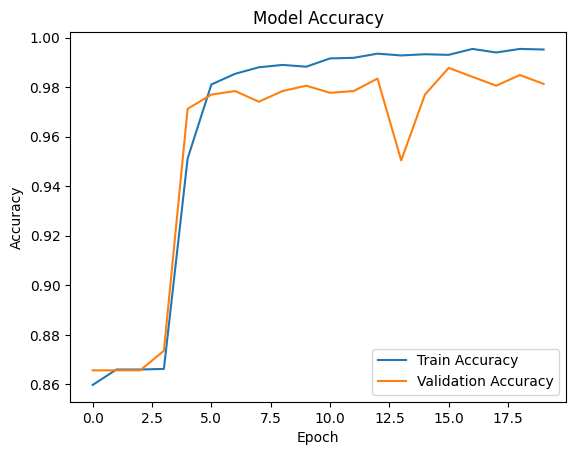

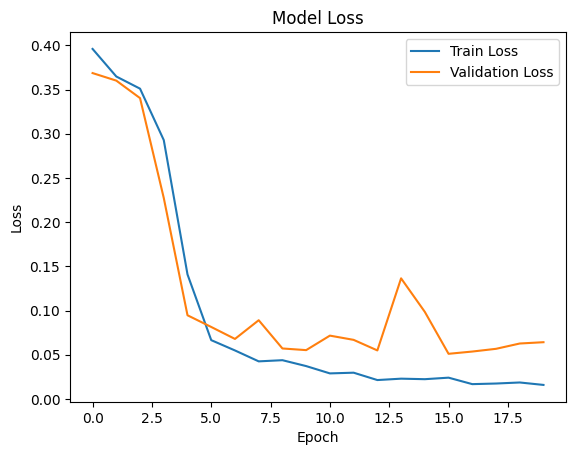

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
    vectorized_text = vectorizer([pred_text])
    prediction_prob = model.predict(vectorized_text)[0][0]
    # Determine label based on probability threshold of 0.5
    label = 'spam' if prediction_prob > 0.5 else 'ham'
    return [float(prediction_prob), label]

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
[0.005803508218377829, 'ham']


In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
You passed the challenge. Great job!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

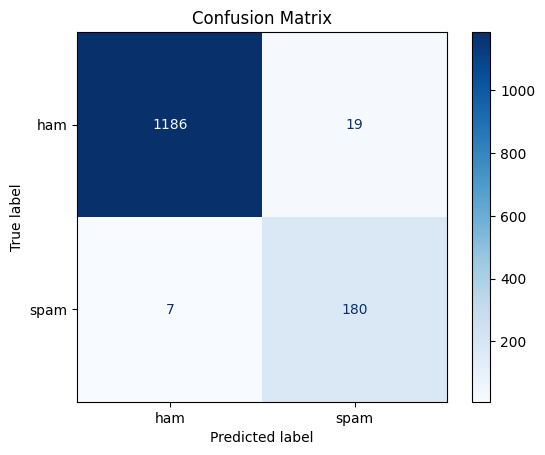

In [ ]:
#Optional
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on test set and calculate confusion matrix
test_preds = [predict_message(text)[1] for text in test_messages]
test_true = ['spam' if label == 1 else 'ham' for label in test_labels]

# Display confusion matrix
cm = confusion_matrix(test_true, test_preds, labels=['ham', 'spam'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()